In [1]:
#Importando Bibliotecas
import pandas as pd
import matplotlib.pyplot as  plt
plt.style.use("seaborn")

In [2]:
#Upload de arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
#Criando um DataFrame
df = pd.read_excel("AdventureWorks.xlsx")

In [4]:
df.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
#Quantidade de linhas e colunas
df.shape

(904, 16)

In [6]:
#Verificando dos tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [7]:
#Valor total de Receita
df["Valor Venda"].sum()

5984606.1426

In [8]:
#Valor do Custo Total
#Cria uma nova coluna multiplicando o custo pela quantidade vendida
df["CustoTotal"] = df["Custo Unitário"].mul(df["Quantidade"])

In [9]:
#Custo Total
round(df["CustoTotal"].sum(),2)

2486783.05

In [10]:
#Calculando o Lucro
df["Lucro"] = df["Valor Venda"] - df["CustoTotal"]

In [11]:
#Calcula tempo para envio de produtos
df["TempoEnvio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [12]:
#Medio de tempo de envio de cada marca
df.groupby("Marca")["TempoEnvio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: TempoEnvio, dtype: float64

In [13]:
#Verifica se há dados em falta
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
CustoTotal        0
Lucro             0
TempoEnvio        0
dtype: int64

In [18]:
#Lucro por Ano e Marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

In [19]:
#Resetando Index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,3.066412e+05
1,2008,Contoso,5.641600e+04
2,2008,Fabrikam,1.557021e+06
3,2009,Adventure Works,4.053951e+05
4,2009,Contoso,1.382590e+05
5,2009,Fabrikam,1.034091e+06


In [21]:
#Total de Produtos Vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

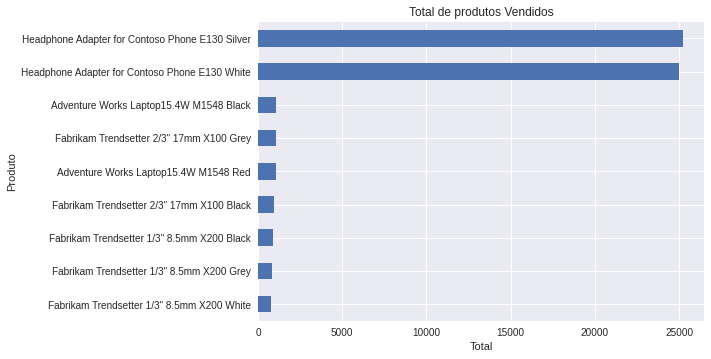

In [24]:
#Grafico do total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = True).plot.barh(title="Total de produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");


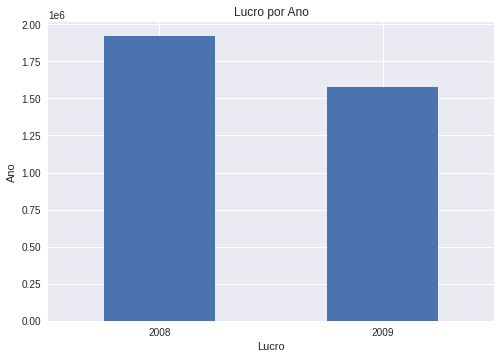

In [38]:
#Grafico de lucro por ano
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro por Ano")
plt.xlabel("Lucro")
plt.ylabel("Ano")
plt.xticks(rotation="horizontal");

In [29]:
#Separando as vendas apenas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]
df_2009.head(2)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,CustoTotal,Lucro,TempoEnvio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,11


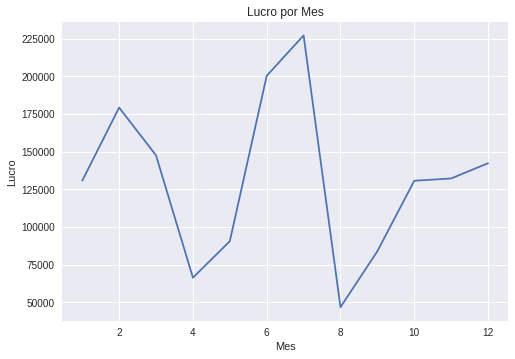

In [32]:
#Lucro por mes em 2009 no formato grafico de linhas
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title = "Lucro por Mes")
plt.xlabel("Mes")
plt.ylabel("Lucro");

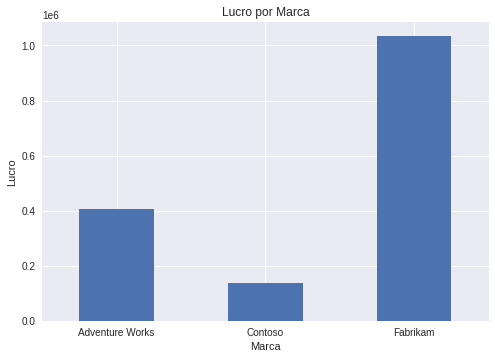

In [37]:
#Lucro por marca em 2009 no formato grafico de linhas
df_2009.groupby(df_2009["Marca"])["Lucro"].sum().plot.bar(title = "Lucro por Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

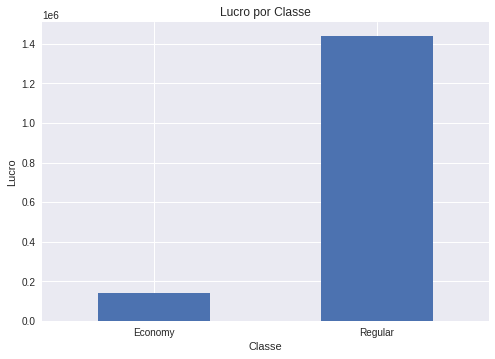

In [39]:
#Lucro por classe em 2009 no formato grafico de linhas
df_2009.groupby(df_2009["Classe"])["Lucro"].sum().plot.bar(title = "Lucro por Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal");

In [42]:
#Análise Estatisticas
df["TempoEnvio"].describe()

count    904.000000
mean       8.543142
std        3.056920
min        4.000000
25%        6.000000
50%        9.000000
75%       11.000000
max       20.000000
Name: TempoEnvio, dtype: float64

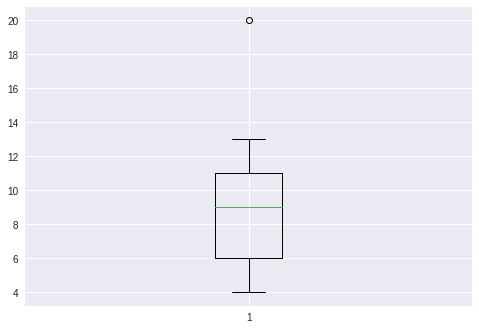

In [46]:
#Grafico de blotspot
plt.boxplot(df["TempoEnvio"]);

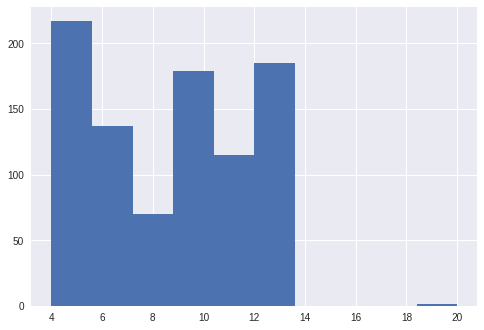

In [47]:
#Grafico de Histrograma
plt.hist(df["TempoEnvio"]);

In [48]:
#Tempo minimo de envio
df["TempoEnvio"].min()

4

In [49]:
#Tempo maximo de envio
df["TempoEnvio"].max()

20

In [52]:
#Tempo minimo de envio
df[df["TempoEnvio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,CustoTotal,Lucro,TempoEnvio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [53]:
#Salvando resultado em csv
df.to_csv("df_vendas_novo.csv", index=False)